In [1]:
import netCDF4 as nc
import matplotlib as plt
fpath = 'D:/'
fname = 'GK2B_GOCI2_L2_20231119_001530_LA_Chl.nc'
fdata = fpath + fname
fdata = nc.Dataset(fdata)

In [2]:
fdata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    processing_end: 20231119015217
    latitude_of_projection_origin: 0.0
    platform: GK-2B
    reference_ellipsoid_name: WGS 84
    horizontal_datum_name: WGS 1984
    processing_level: L2
    time_synchro_utc: 20231119_001545
    time_synchro_obt: 753624945.0882081
    geospatial_lon_resolution: 250 meters
    geographic_crs_name: WGS 84
    reference: 
    earth_radius: 6378137.0
    slot_acquisition_time: 20231119_001545
    geospatial_lon_units: degree_east
    semi_minor_axis: 6356752.3
    geospatial_lat_units: degree_north
    perspective_point_height: 35786000.0
    earth_ellipsoid_center: [0. 0. 0.]
    semi_major_axis: 6378137.0
    instrument: GOCI-II
    sub_longitude: 0.0
    comment: 
    grid_mapping_name: geostationary
    projection_type: GEOS
    keywords: 
    publisher_url: http://www.khoa.go.kr/nosc
    title: GK2B GOCI-II Level-2 Data
    summary: GK2B GOCI-II Level-2 Data
   

In [3]:
nav_data = fdata.groups['navigation_data']
nav_data
print(list(nav_data.variables))
print(nav_data['latitude'][:])
print(nav_data['longitude'][:])

['latitude', 'longitude']
[[48.832775 48.832596 48.832417 ... 49.15735  49.157604 49.15786 ]
 [48.82841  48.82823  48.828053 ... 49.152885 49.15314  49.1534  ]
 [48.824047 48.823868 48.82369  ... 49.148426 49.14868  49.14894 ]
 ...
 [23.266666 23.266624 23.266582 ... 23.3398   23.339857 23.339914]
 [23.264069 23.264027 23.263987 ... 23.337193 23.337248 23.337305]
 [23.26147  23.26143  23.261389 ... 23.334583 23.33464  23.334698]]
[[111.604034 111.60793  111.61183  ... 150.84639  150.85059  150.85478 ]
 [111.60569  111.60959  111.61349  ... 150.84398  150.84818  150.85239 ]
 [111.60734  111.611244 111.61514  ... 150.84158  150.84578  150.84998 ]
 ...
 [116.91406  116.916626 116.91919  ... 143.37364  143.37628  143.3789  ]
 [116.91432  116.916885 116.91945  ... 143.37329  143.37592  143.37856 ]
 [116.91457  116.91714  116.9197   ... 143.37294  143.37556  143.3782  ]]


In [4]:
geo_data = fdata.groups['geophysical_data']
geo_data

<class 'netCDF4._netCDF4.Group'>
group /geophysical_data:
    dimensions(sizes): 
    variables(dimensions): float32 Chl(number_of_lines, pixels_per_line), uint8 flag(number_of_lines, pixels_per_line)
    groups: 

In [5]:
print(list(geo_data.variables))

['Chl', 'flag']


In [6]:
chl =geo_data.variables['Chl'][:]
print(chl)
print(chl.shape)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
(8000, 10500)


In [7]:
chl[5000][2600]
max_val = np.max(chl)
print("Maximum value in chl:", max_val)

NameError: name 'np' is not defined

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.imshow(chl)

In [ ]:
# 마스크된 배열에서 마스크된 부분을 na로 채우기
# 넘파이 배열로 변환
chl_data = np.ma.filled(chl,np.nan)

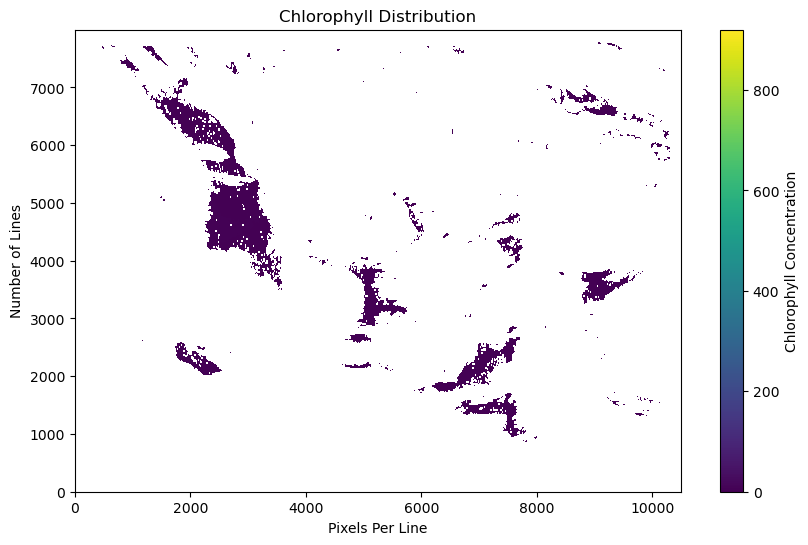

In [44]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
geo_data = fdata.groups['geophysical_data']
chl = geo_data.variables['Chl'][:]
chl = np.ma.filled(chl,np.nan)
# Plot the data
plt.figure(figsize=(10, 6))
plt.imshow(chl, origin='lower')
plt.colorbar(label='Chlorophyll Concentration')
plt.title('Chlorophyll Distribution')
plt.xlabel('Pixels Per Line')
plt.ylabel('Number of Lines')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# 마스크된 부분 nan으로 채우기
# 넘파이 배열로
chl_data = np.ma.filled(chl, np.nan)

# nan값을 제외하고 10번째 10번째 백분위수, 90번째 백분위수로 이상치 검증
vmin, vmax = np.nanpercentile(chl_data, [10, 90])
chl_norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(chl_data, origin='lower', cmap='viridis', norm=chl_norm)
plt.colorbar(label='Chlorophyll Concentration (mg m^-3)')
plt.title('Chlorophyll Distribution')
plt.xlabel('Pixels Per Line')
plt.ylabel('Number of Lines')
plt.show()

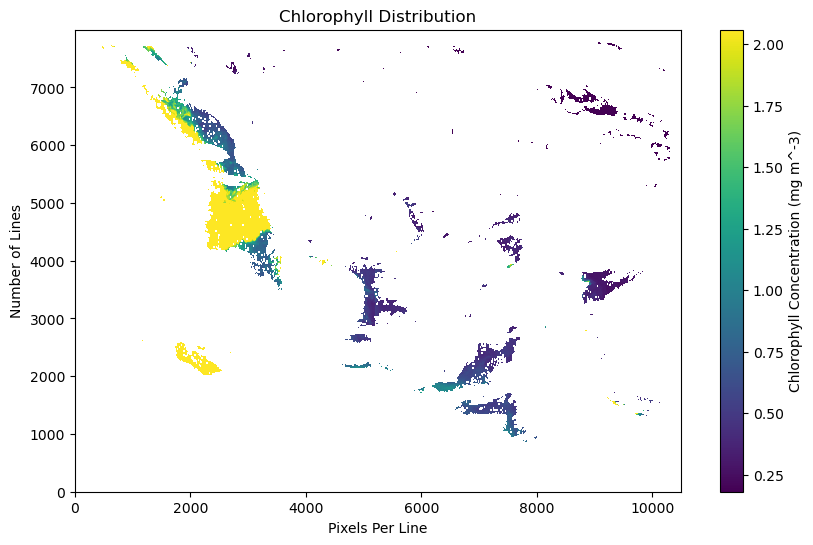

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


chl_data = np.ma.filled(chl, np.nan)

vmin, vmax = np.nanpercentile(chl_data, [15, 85])
chl_norm = colors.Normalize(vmin=vmin, vmax=vmax)


plt.figure(figsize=(10, 6))
plt.imshow(chl_data, origin='lower', cmap='viridis', norm=chl_norm)
plt.colorbar(label='Chlorophyll Concentration (mg m^-3)')
plt.title('Chlorophyll Distribution')
plt.xlabel('Pixels Per Line')
plt.ylabel('Number of Lines')
plt.show()

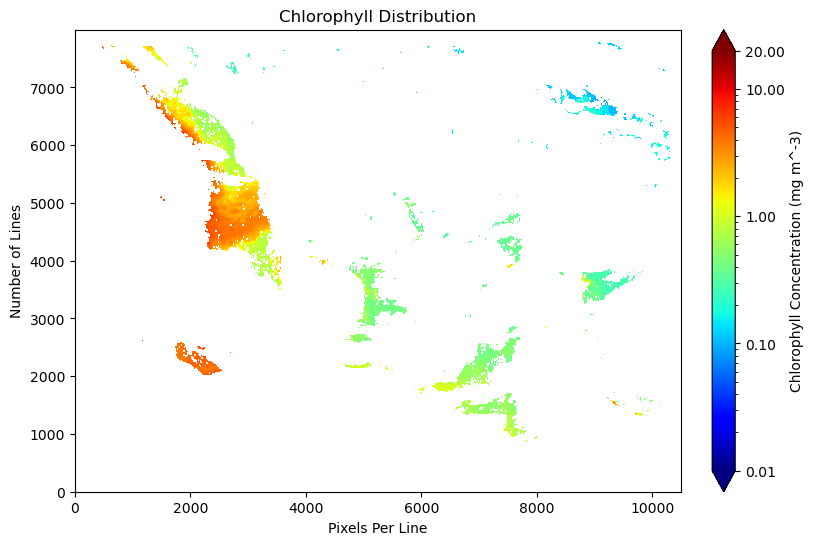

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


chl_data = np.ma.filled(chl, np.nan)

# 최소 0.01, 최대 20.0으로 잡음
chl_norm = colors.LogNorm(vmin=0.01, vmax=20.0)


plt.figure(figsize=(10, 6))
img = plt.imshow(chl_data, origin='lower', cmap='jet', norm=chl_norm)

# Create colorbar with specified ticks
cbar = plt.colorbar(img, extend='both', fraction=0.046, pad=0.04)
cbar.set_label('Chlorophyll Concentration (mg m^-3)')
cbar.set_ticks([0.01, 0.1, 1.0, 10.0, 20.0])  # Set custom ticks
cbar.ax.set_yticklabels(['0.01', '0.10', '1.00', '10.00', '20.00'])  # Set custom tick labels

plt.title('Chlorophyll Distribution')
plt.xlabel('Pixels Per Line')
plt.ylabel('Number of Lines')
plt.show()

In [10]:
fdata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    processing_end: 20231119015217
    latitude_of_projection_origin: 0.0
    platform: GK-2B
    reference_ellipsoid_name: WGS 84
    horizontal_datum_name: WGS 1984
    processing_level: L2
    time_synchro_utc: 20231119_001545
    time_synchro_obt: 753624945.0882081
    geospatial_lon_resolution: 250 meters
    geographic_crs_name: WGS 84
    reference: 
    earth_radius: 6378137.0
    slot_acquisition_time: 20231119_001545
    geospatial_lon_units: degree_east
    semi_minor_axis: 6356752.3
    geospatial_lat_units: degree_north
    perspective_point_height: 35786000.0
    earth_ellipsoid_center: [0. 0. 0.]
    semi_major_axis: 6378137.0
    instrument: GOCI-II
    sub_longitude: 0.0
    comment: 
    grid_mapping_name: geostationary
    projection_type: GEOS
    keywords: 
    publisher_url: http://www.khoa.go.kr/nosc
    title: GK2B GOCI-II Level-2 Data
    summary: GK2B GOCI-II Level-2 Data
   

In [11]:
nav_data =fdata.groups['navigation_data']
nav_data

<class 'netCDF4._netCDF4.Group'>
group /navigation_data:
    dimensions(sizes): 
    variables(dimensions): float32 latitude(number_of_lines, pixels_per_line), float32 longitude(number_of_lines, pixels_per_line)
    groups: 

In [12]:
lats =nav_data.variables['latitude'][:]
lons = nav_data.variables['longitude'][:]

In [13]:
lats,lons

(masked_array(
   data=[[48.832775, 48.832596, 48.832417, ..., 49.15735 , 49.157604,
          49.15786 ],
         [48.82841 , 48.82823 , 48.828053, ..., 49.152885, 49.15314 ,
          49.1534  ],
         [48.824047, 48.823868, 48.82369 , ..., 49.148426, 49.14868 ,
          49.14894 ],
         ...,
         [23.266666, 23.266624, 23.266582, ..., 23.3398  , 23.339857,
          23.339914],
         [23.264069, 23.264027, 23.263987, ..., 23.337193, 23.337248,
          23.337305],
         [23.26147 , 23.26143 , 23.261389, ..., 23.334583, 23.33464 ,
          23.334698]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[111.604034, 111.60793 , 111.61183 , ..., 150.84639 , 150.85059 ,
          150.85478 ],
         [111.60569 , 111.60959 , 111.61349 , ..., 150.84398 , 150.84818 ,
          150.85239 ],
         [111.60734 , 111.611244, 111.61514 , ..., 150.84158 , 150.84578 ,
          150.84998 ],
         ...,
         [116.91406 , 116.916626, 116.91

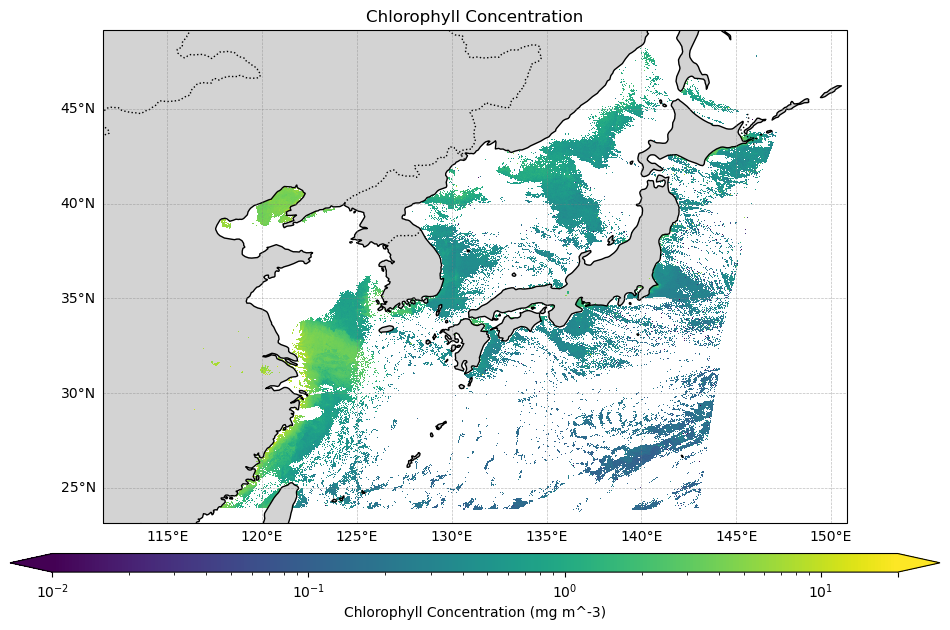

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset


chl_norm = colors.LogNorm(vmin=0.01, vmax=20)


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  


min_lon, max_lon = np.min(lons), np.max(lons)
min_lat, max_lat = np.min(lats), np.max(lats)

# Zoom in on the region of interest
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add map features for context
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot the chlorophyll data with pcolormesh
i


# Add a colorbar
cbar = plt.colorbar(img, extend='both', orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Chlorophyll Concentration (mg m^-3)')
cbar.set_ticks([0.01, 0.1, 1, 10, 20])  # Set custom ticks

# Add a title
plt.title('Chlorophyll Concentration')

plt.show()

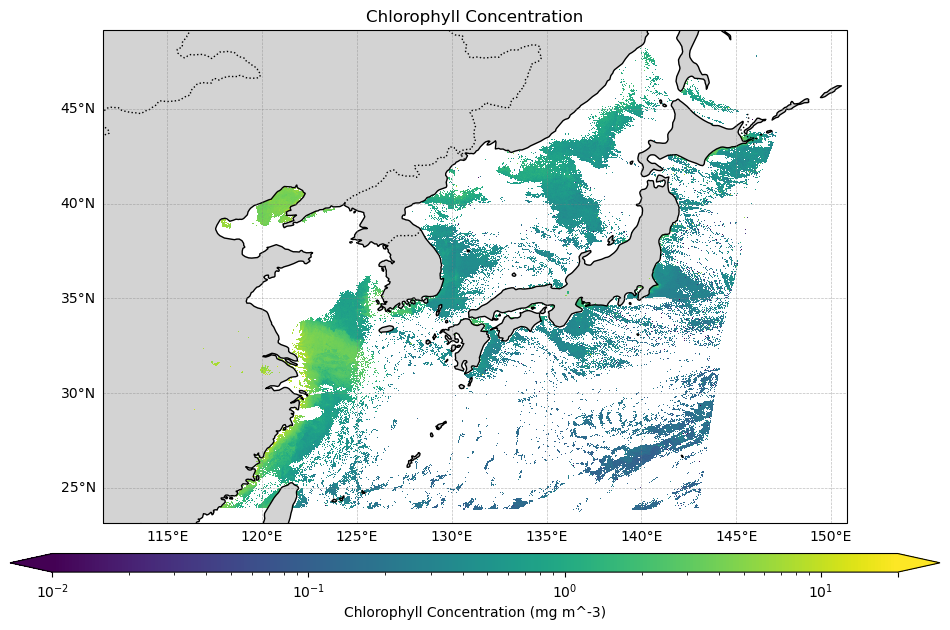

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib import colors


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  


chl_norm = colors.LogNorm(vmin=0.01, vmax=20)


min_lon, max_lon = np.min(lons), np.max(lons)
min_lat, max_lat = np.min(lats), np.max(lats)
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


img = ax.pcolormesh(lons, lats, chl, norm=chl_norm, cmap='viridis', transform=ccrs.PlateCarree())


cbar = plt.colorbar(img, extend='both', orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Chlorophyll Concentration (mg m^-3)')
cbar.set_ticks([0.01, 0.1, 1, 10, 20])  # Set custom ticks

# Add a title
plt.title('Chlorophyll Concentration')

plt.show()


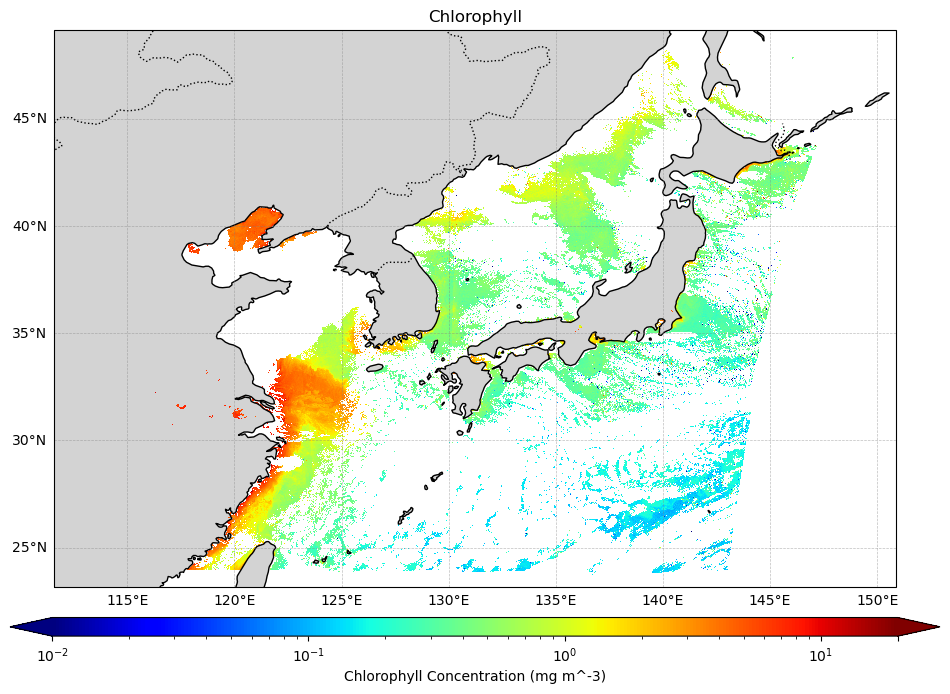

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

min_lon, max_lon = np.min(lons), np.max(lons)
min_lat, max_lat = np.min(lats), np.max(lats)

# 엽록소 농도 정규화
chl_norm = colors.LogNorm(vmin=0.01, vmax=20.00)

# 지도 투영
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


# 경위도, 엽록소 데이터 지도에 투영. 
img = ax.pcolormesh(lons, lats, chl, norm=chl_norm, cmap='jet', transform=ccrs.PlateCarree())


cbar = plt.colorbar(img, extend='both', orientation='horizontal', pad=0.05, aspect=50, fraction=0.046)
cbar.set_label('Chlorophyll Concentration (mg m^-3)')
cbar.set_ticks([0.01, 0.1, 1, 10, 20.00])  # Set custom ticks


plt.title('Chlorophyll')

plt.show()
